# Loading libraries

In [183]:
import bamboolib as bam 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
from dateutil.relativedelta import relativedelta

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

import statsmodels.api as sm
from sklearn import svm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score, confusion_matrix, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Import file

In [187]:
df = pd.read_excel(r'/Users/abhi/Documents/NU/AAA_Courses/ALY6020 Predictive Analytics/W3/Assignment/marketing_campaign.xlsx')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data Cleaning 

In [188]:
# Removing unwanted variables for analysis
df = df.drop(columns=['Z_Revenue', 'Z_CostContact', 'AcceptedCmp2', 'AcceptedCmp1', 'AcceptedCmp4', 'AcceptedCmp3', 'AcceptedCmp5'])
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,46,27,15,5,5,3,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,42,118,247,2,9,3,4,5,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,8,7,8,2,5,7,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,32,12,24,1,2,3,13,6,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,80,30,61,2,6,5,10,3,0,0


In [189]:
df.shape

(2240, 22)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [191]:
# Summary of dataset
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.009375,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


## Missing values check 

In [192]:
# percentage of missing values per column
(df.isna().sum() / len(df)) * 100
# 24 records have nul value in income which accounts to 1.07%. 
# As the percentage is so low and income histogram shows a normal distribution with slightly skewed to right, 
# I imputed the missing values with median value of income 

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [193]:
fig = px.histogram(df.dropna(subset=['Income']), x='Income', title='Histogram of income')
fig

In [194]:
df[['Income']] = df[['Income']].fillna(df[['Income']].median())

In [195]:
# Checking missing value percentage again to confirm that all missing values were filled. 
(df.isna().sum() / len(df)) * 100

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
Complain               0.0
Response               0.0
dtype: float64

## Checking for duplicates using ID column 

In [196]:
# Check to see if 'id' is unique identifier for each sample
print('Sum of duplicate values:{}\n'.format(df.ID.duplicated().sum()))
# No duplicate values found. 

Sum of duplicate values:0



In [199]:
df = df.drop(columns=['ID'])

## Feature Engineering 

In [200]:
df_clean = df

In [201]:
# ID has no duplicates, and acts as a unique identifier for the records. 
# Year_Birth can be converted to age for better analysis. 
# Get the current year
current_year = datetime.now().year

# Create a new column 'age' and calculate age from 'year' column
df_clean['Age'] = df_clean['Year_Birth'].apply(lambda x: current_year - x)
df_clean.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,88,88,3,8,10,4,7,0,1,66
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,1,6,2,1,1,2,5,0,0,69
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,21,42,1,8,2,10,4,0,0,58
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,3,5,2,2,0,4,6,0,0,39
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,27,15,5,5,3,6,5,0,0,42


In [202]:
# Dropping Year_Birth as it would be highly correlated with age as per the previous calculations. 

df_clean = df_clean.drop(columns=['Year_Birth'])
df_clean.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age
0,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,...,88,88,3,8,10,4,7,0,1,66
1,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,...,1,6,2,1,1,2,5,0,0,69
2,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,21,42,1,8,2,10,4,0,0,58
3,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,...,3,5,2,2,0,4,6,0,0,39
4,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,27,15,5,5,3,6,5,0,0,42


In [203]:
# Education unique values
df_clean['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [204]:
fig = px.histogram(df_clean, x='Education')
fig

In [205]:
fig = px.histogram(df_clean, x='Education', color='Response', title='High school graduation seems to be the highest education level of most of our readers')
fig

In [206]:
tmp_condition = df_clean['Education'].isin(['PhD', 'Master'])
df_clean.loc[tmp_condition, 'Education'] = 1
df_clean.loc[~tmp_condition, 'Education'] = 0
df_clean.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age
0,0,Single,58138.0,0,0,2012-09-04,58,635,88,546,...,88,88,3,8,10,4,7,0,1,66
1,0,Single,46344.0,1,1,2014-03-08,38,11,1,6,...,1,6,2,1,1,2,5,0,0,69
2,0,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,21,42,1,8,2,10,4,0,0,58
3,0,Together,26646.0,1,0,2014-02-10,26,11,4,20,...,3,5,2,2,0,4,6,0,0,39
4,1,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,27,15,5,5,3,6,5,0,0,42


In [207]:
# Education unique values
df_clean['Education'].unique()

# 1 indicates higher education of Masters or PhD and 0 indicates Graduation, Basic or 2n Cycle which implies no higher education

array([0, 1], dtype=object)

In [208]:
df_clean['Education'] = pd.to_numeric(df_clean['Education'], downcast='integer', errors='coerce')
df_clean

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age
0,0,Single,58138.0,0,0,2012-09-04,58,635,88,546,...,88,88,3,8,10,4,7,0,1,66
1,0,Single,46344.0,1,1,2014-03-08,38,11,1,6,...,1,6,2,1,1,2,5,0,0,69
2,0,Together,71613.0,0,0,2013-08-21,26,426,49,127,...,21,42,1,8,2,10,4,0,0,58
3,0,Together,26646.0,1,0,2014-02-10,26,11,4,20,...,3,5,2,2,0,4,6,0,0,39
4,1,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,27,15,5,5,3,6,5,0,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,Married,61223.0,0,1,2013-06-13,46,709,43,182,...,118,247,2,9,3,4,5,0,0,56
2236,1,Together,64014.0,2,1,2014-06-10,56,406,0,30,...,0,8,7,8,2,5,7,0,0,77
2237,0,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,...,12,24,1,2,3,13,6,0,0,42
2238,1,Together,69245.0,0,1,2014-01-24,8,428,30,214,...,30,61,2,6,5,10,3,0,0,67


In [209]:
fig = px.histogram(df_clean, x='Marital_Status')
fig

In [210]:
df_clean.loc[df_clean['Marital_Status'].isin(['Single', 'Together', 'Widow', 'Alone', 'Absurd', 'YOLO']), 'Marital_Status'] = 'Other'
df_clean

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age
0,0,Other,58138.0,0,0,2012-09-04,58,635,88,546,...,88,88,3,8,10,4,7,0,1,66
1,0,Other,46344.0,1,1,2014-03-08,38,11,1,6,...,1,6,2,1,1,2,5,0,0,69
2,0,Other,71613.0,0,0,2013-08-21,26,426,49,127,...,21,42,1,8,2,10,4,0,0,58
3,0,Other,26646.0,1,0,2014-02-10,26,11,4,20,...,3,5,2,2,0,4,6,0,0,39
4,1,Married,58293.0,1,0,2014-01-19,94,173,43,118,...,27,15,5,5,3,6,5,0,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,Married,61223.0,0,1,2013-06-13,46,709,43,182,...,118,247,2,9,3,4,5,0,0,56
2236,1,Other,64014.0,2,1,2014-06-10,56,406,0,30,...,0,8,7,8,2,5,7,0,0,77
2237,0,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,...,12,24,1,2,3,13,6,0,0,42
2238,1,Other,69245.0,0,1,2014-01-24,8,428,30,214,...,30,61,2,6,5,10,3,0,0,67


In [211]:
df_clean = pd.get_dummies(df_clean, columns=['Marital_Status'], drop_first=False, dummy_na=False)
df_clean

,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Other
0,0,58138.0,0,0,2012-09-04,58,635,88,546,172,...,8,10,4,7,0,1,66,0,0,1
1,0,46344.0,1,1,2014-03-08,38,11,1,6,2,...,1,1,2,5,0,0,69,0,0,1
2,0,71613.0,0,0,2013-08-21,26,426,49,127,111,...,8,2,10,4,0,0,58,0,0,1
3,0,26646.0,1,0,2014-02-10,26,11,4,20,10,...,2,0,4,6,0,0,39,0,0,1
4,1,58293.0,1,0,2014-01-19,94,173,43,118,46,...,5,3,6,5,0,0,42,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,0,1,2013-06-13,46,709,43,182,42,...,9,3,4,5,0,0,56,0,1,0
2236,1,64014.0,2,1,2014-06-10,56,406,0,30,0,...,8,2,5,7,0,0,77,0,0,1
2237,0,56981.0,0,0,2014-01-25,91,908,48,217,32,...,2,3,13,6,0,0,42,1,0,0
2238,1,69245.0,0,1,2014-01-24,8,428,30,214,80,...,6,5,10,3,0,0,67,0,0,1


In [212]:
df_clean.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Response', 'Age',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Other'],
      dtype='object')

In [215]:
# Dt_Customer date to be converted to number of months after enrollment to the magazine 

# Convert Dt_Customer to date time 
df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'], infer_datetime_format=True)
df_clean

,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Other
0,0,58138.0,0,0,2012-09-04,58,635,88,546,172,...,8,10,4,7,0,1,66,0,0,1
1,0,46344.0,1,1,2014-03-08,38,11,1,6,2,...,1,1,2,5,0,0,69,0,0,1
2,0,71613.0,0,0,2013-08-21,26,426,49,127,111,...,8,2,10,4,0,0,58,0,0,1
3,0,26646.0,1,0,2014-02-10,26,11,4,20,10,...,2,0,4,6,0,0,39,0,0,1
4,1,58293.0,1,0,2014-01-19,94,173,43,118,46,...,5,3,6,5,0,0,42,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,0,1,2013-06-13,46,709,43,182,42,...,9,3,4,5,0,0,56,0,1,0
2236,1,64014.0,2,1,2014-06-10,56,406,0,30,0,...,8,2,5,7,0,0,77,0,0,1
2237,0,56981.0,0,0,2014-01-25,91,908,48,217,32,...,2,3,13,6,0,0,42,1,0,0
2238,1,69245.0,0,1,2014-01-24,8,428,30,214,80,...,6,5,10,3,0,0,67,0,0,1


In [216]:
# create a new column to store the number of months
df_clean["Months_Since_Joining"] = df_clean["Dt_Customer"].apply(lambda x: relativedelta(datetime.now(), x).months)

In [217]:
df_clean = df_clean.drop(columns=['Dt_Customer'])
df_clean.head()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Other,Months_Since_Joining
0,0,58138.0,0,0,58,635,88,546,172,88,...,10,4,7,0,1,66,0,0,1,4
1,0,46344.0,1,1,38,11,1,6,2,1,...,1,2,5,0,0,69,0,0,1,10
2,0,71613.0,0,0,26,426,49,127,111,21,...,2,10,4,0,0,58,0,0,1,5
3,0,26646.0,1,0,26,11,4,20,10,3,...,0,4,6,0,0,39,0,0,1,11
4,1,58293.0,1,0,94,173,43,118,46,27,...,3,6,5,0,0,42,0,1,0,0


In [218]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Education                2240 non-null   int8   
 1   Income                   2240 non-null   float64
 2   Kidhome                  2240 non-null   int64  
 3   Teenhome                 2240 non-null   int64  
 4   Recency                  2240 non-null   int64  
 5   MntWines                 2240 non-null   int64  
 6   MntFruits                2240 non-null   int64  
 7   MntMeatProducts          2240 non-null   int64  
 8   MntFishProducts          2240 non-null   int64  
 9   MntSweetProducts         2240 non-null   int64  
 10  MntGoldProds             2240 non-null   int64  
 11  NumDealsPurchases        2240 non-null   int64  
 12  NumWebPurchases          2240 non-null   int64  
 13  NumCatalogPurchases      2240 non-null   int64  
 14  NumStorePurchases       

In [219]:
# Summary of dataset
df_clean.describe()

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Other,Months_Since_Joining
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.382143,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.009375,0.149107,54.194196,0.103571,0.385714,0.510714,5.466071
std,0.486020,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.096391,0.356274,11.984069,0.304772,0.486872,0.499997,3.490139
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,46.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,53.000000,0.000000,0.000000,1.000000,5.000000
75%,1.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,64.000000,0.000000,1.000000,1.000000,9.000000
max,1.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,130.000000,1.000000,1.000000,1.000000,11.000000


## Box plot for checking outliers 

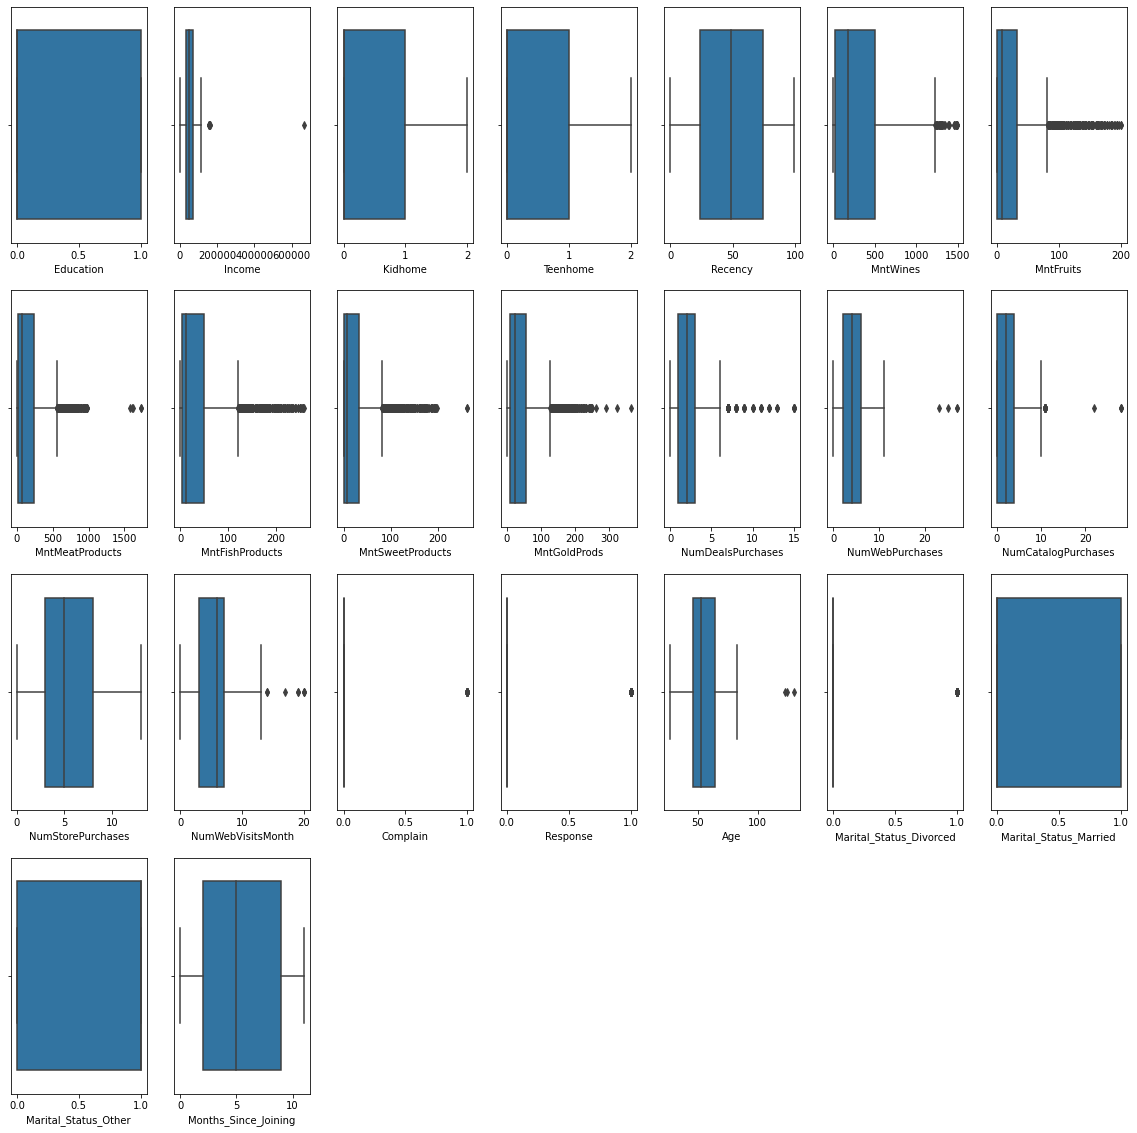

In [220]:
# ploting boxplot for all the columns to see distribution of the data in each columns 
plt.figure(figsize =(20, 20 ))
x = 1 

for column in df_clean.columns:
    plt.subplot(4,7,x)
    sns.boxplot(df_clean[column])
    x+=1
plt.tight_layout
plt.show()

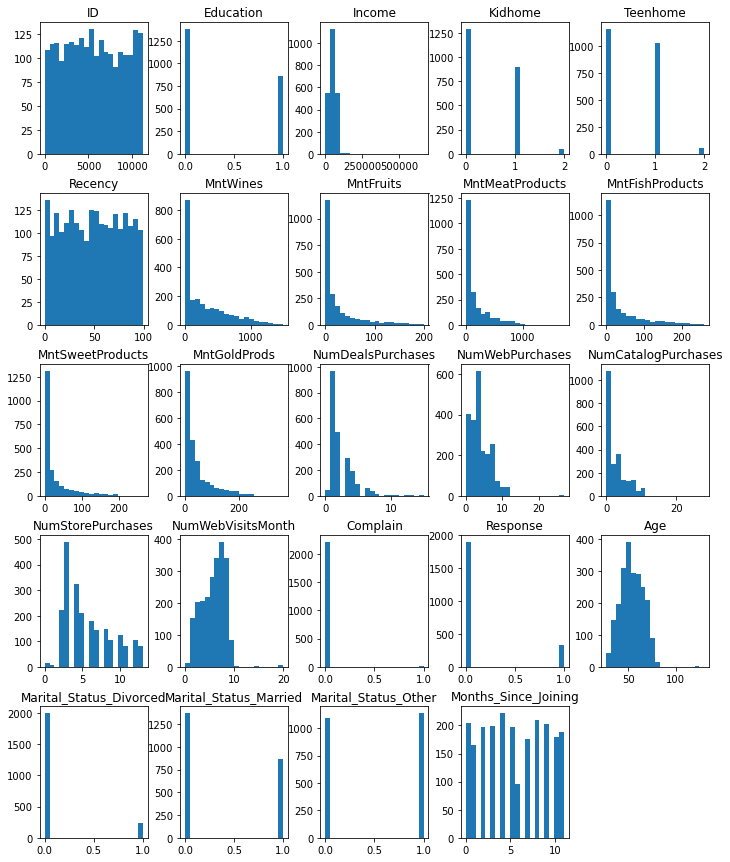

In [88]:
## Exploratory data analysis 

# Visualizing the distribution 
df_clean.hist(figsize=(12,15),bins=20, grid=False)
plt.show()

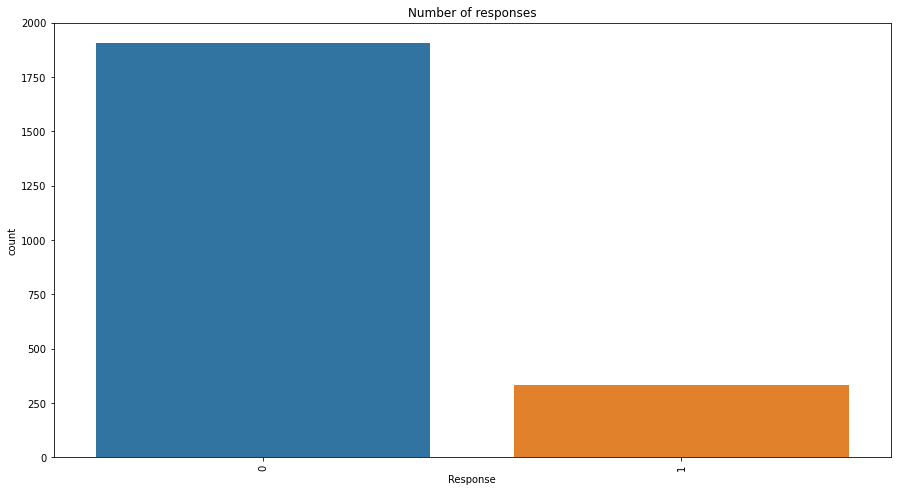

In [221]:
plt.figure(figsize = (15, 8))

sns.countplot(df_clean['Response'])
plt.xticks(rotation = 90)
plt.title('Number of responses')

plt.show()

In [222]:
fig = px.histogram(df_clean, x='Kidhome', color='Response', title='Number of kids per household grouped by response')
fig

In [223]:
fig = px.histogram(df_clean, x='Teenhome', color='Response', title='Number of teens per household grouped by response')
fig

In [224]:
fig = px.histogram(df_clean, x='Months_Since_Joining', color='Response', title='Most responses are seen between 2-4 months of enrollment')
fig

In [225]:
fig = px.histogram(df_clean, x='Recency', color='Response', title='More frequent the purchase, higher the response rate')
fig

In [226]:
fig = px.histogram(df_clean, x='Age', title='Majority of the customers are 44-54 years of age')
fig

## Correlation plot

<AxesSubplot:>

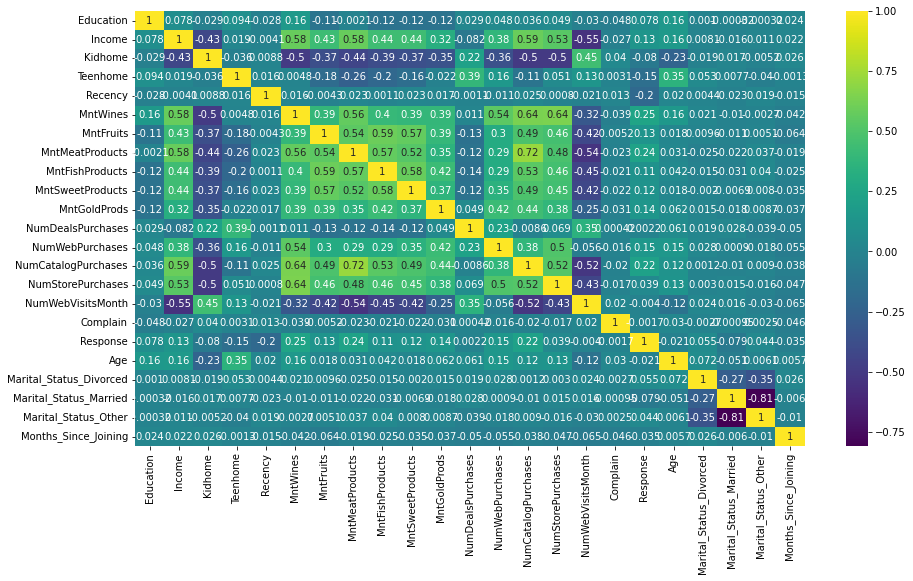

In [227]:
plt.figure(figsize=(15,8))
sns.heatmap(df_clean.corr(), annot=True, cmap='viridis')

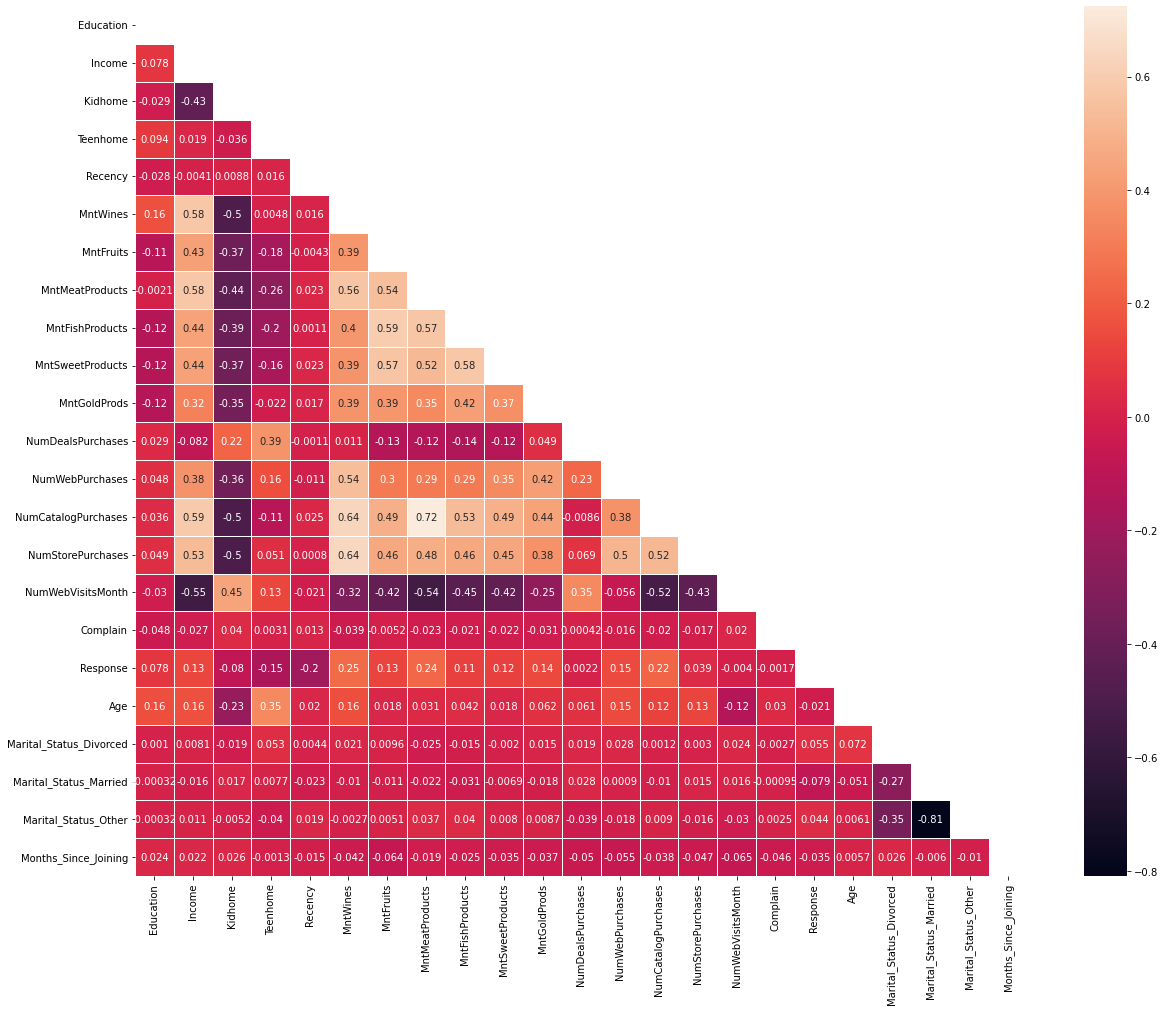

In [228]:
corr=df_clean.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(corr, mask=mask, annot=True, linewidths=.8, ax=ax)
plt.show()

In [229]:
correlation = df_clean.corr()
correlation['Response'].sort_values(ascending = False)[1:]

MntWines                   0.247254
MntMeatProducts            0.236335
NumCatalogPurchases        0.220810
NumWebPurchases            0.148730
MntGoldProds               0.139850
Income                     0.132867
MntFruits                  0.125289
MntSweetProducts           0.117372
MntFishProducts            0.111331
Education                  0.078320
Marital_Status_Divorced    0.055147
Marital_Status_Other       0.043680
NumStorePurchases          0.039363
NumDealsPurchases          0.002238
Complain                  -0.001707
NumWebVisitsMonth         -0.003987
Age                       -0.021325
Months_Since_Joining      -0.035081
Marital_Status_Married    -0.079378
Kidhome                   -0.080008
Teenhome                  -0.154446
Recency                   -0.198437
Name: Response, dtype: float64

## Multicollinearity 

In [230]:
def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [231]:
calc_vif(df_clean)

,variables,VIF
0,Education,1.152680
1,Income,2.170553
2,Kidhome,1.862853
3,Teenhome,1.605754
4,Recency,1.059441
5,MntWines,2.804216
6,MntFruits,1.951649
7,MntMeatProducts,2.903136
8,MntFishProducts,2.099385
9,MntSweetProducts,1.913837


In [232]:
df_clean = df_clean.drop(columns=['Marital_Status_Other'])
calc_vif(df_clean)

,variables,VIF
0,Education,1.860208
1,Income,10.361723
2,Kidhome,2.917732
3,Teenhome,2.972172
4,Recency,3.894716
5,MntWines,4.847229
6,MntFruits,2.802659
7,MntMeatProducts,4.462862
8,MntFishProducts,3.089583
9,MntSweetProducts,2.732360


# Modelling 

## Train-test split 

In [246]:
# 80/20 division of training and test dataset
X_train, X_test, y_train, y_test = train_test_split(df_clean.drop('Response',axis=1), 
                                                    df_clean['Response'], test_size=0.20, 
                                                    random_state=100)

## Feature scaling 

In [247]:
# Feature before mean normalization
unscaled_features = X_train
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_array = sc.fit_transform(X_train.values)
# Assign the scaled data to a DataFrame and use the index and columns arguments to keep original indeces and column names:
X_train = pd.DataFrame(X_train_array, index= X_train.index, columns= X_train.columns)
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index= X_test.index, columns= X_test.columns)

## Logistic Regression

In [248]:
import statsmodels.api as sm

# logit = sm.add_constant(X_train) 
# logit_model = sm.Logit(y_train, logit) 
# logit_fit = logit_model.fit()
# print(logit_fit.summary())

log_model = sm.Logit(y_train, X_train).fit()
print(log_model.summary())

Optimization terminated successfully.
         Current function value: 0.641498
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1792
Model:                          Logit   Df Residuals:                     1771
Method:                           MLE   Df Model:                           20
Date:                Sun, 29 Jan 2023   Pseudo R-squ.:                 -0.5100
Time:                        12:24:38   Log-Likelihood:                -1149.6
converged:                       True   LL-Null:                       -761.30
Covariance Type:            nonrobust   LLR p-value:                     1.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Education                   0.0953      0.053      1.785      0.074      -0.009   

In [249]:
p_val = pd.DataFrame(log_model.pvalues, columns=['p_value'])
coef = pd.DataFrame(log_model.params, columns= ['coef'])
p_coef = pd.concat([coef, p_val], axis = 1)
p_coef = p_coef.reset_index()
p_coef

,index,coef,p_value
0,Education,0.095292,7.419556e-02
1,Income,-0.008319,9.042383e-01
2,Kidhome,0.019608,7.766733e-01
3,Teenhome,-0.181466,4.211393e-03
4,Recency,-0.333243,4.757367e-11
5,MntWines,0.356404,6.599648e-05
6,MntFruits,0.023022,7.509484e-01
7,MntMeatProducts,0.264430,4.343449e-03
8,MntFishProducts,0.001064,9.886142e-01
9,MntSweetProducts,0.041246,5.549875e-01


In [250]:
print(p_coef[p_coef['p_value'] < 0.05].sort_values('coef', ascending=False))

                index      coef       p_value
5            MntWines  0.356404  6.599648e-05
7     MntMeatProducts  0.264430  4.343449e-03
15  NumWebVisitsMonth  0.250698  1.389404e-03
3            Teenhome -0.181466  4.211393e-03
4             Recency -0.333243  4.757367e-11
14  NumStorePurchases -0.352695  7.693107e-06


In [251]:
model=LogisticRegression(solver='liblinear',random_state=0).fit(X_train,y_train)
y_pred=model.predict(X_test)

print("Confusion Matrix\n",confusion_matrix(y_test, model.predict(X_test)))

Confusion Matrix
 [[371  14]
 [ 45  18]]


In [252]:
print("Classification Report\n",classification_report(y_test, model.predict(X_test)))

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       385
           1       0.56      0.29      0.38        63

    accuracy                           0.87       448
   macro avg       0.73      0.62      0.65       448
weighted avg       0.85      0.87      0.85       448



In [253]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print('F1 score: %.3f' % f1_score(y_test, y_pred,average='weighted' ))

print('MSE: %.3f' % mse)

Accuracy: 0.868
Precision: 0.562
Recall: 0.286
F1 score: 0.849
MSE: 0.132


<AxesSubplot:>

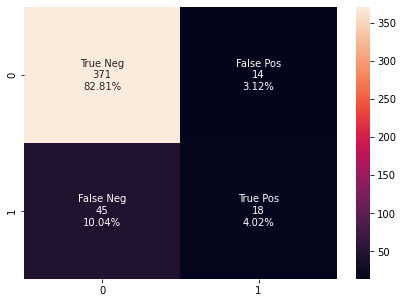

In [241]:
confusionMatrix1 = metrics.confusion_matrix(y_test, y_pred)

fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusionMatrix1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusionMatrix1.flatten()/np.sum(confusionMatrix1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusionMatrix1, annot=labels, fmt='')

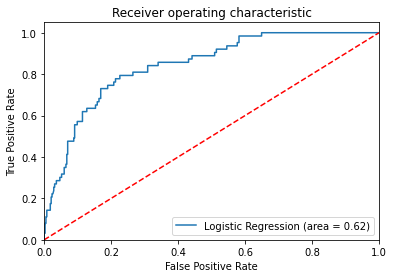

In [242]:
# ROC curve 
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_roc_auc = roc_auc_score(y_test, logit.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logit.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## SVM 

In [243]:
svm_model = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
svm_model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svm_model.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[385,   0],
       [ 63,   0]])

<AxesSubplot:>

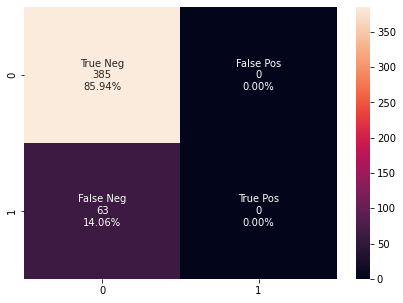

In [244]:
confusionMatrix1 = metrics.confusion_matrix(y_test, y_pred)

fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                confusionMatrix1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusionMatrix1.flatten()/np.sum(confusionMatrix1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusionMatrix1, annot=labels, fmt='')

In [245]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 score: %.3f' % f1_score(y_test, y_pred,average='weighted' ))
mse = mean_squared_error(y_test, y_pred)
print('MSE: %.3f' % mse)

Accuracy: 0.859
Precision: 0.000
Recall: 0.000
F1 score: 0.794
MSE: 0.141


AUC: 0.6246753246753246


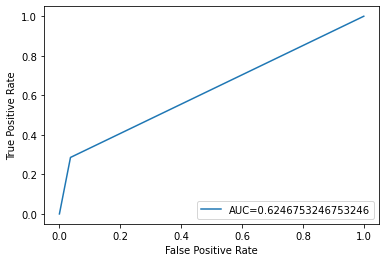

In [254]:
# Calculate the AUC
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()